50 64 42 20
77 24 35 33


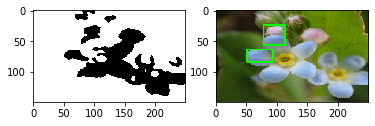

In [6]:
import cv2
import matplotlib.pyplot as plt

#画像を読み込んでリサイズ
img = cv2.imread("3_4_1_test1.jpg")
img = cv2.resize(img, (250,150))

#色空間を二値化
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray,140,240,cv2.THRESH_BINARY_INV)[1]

#画面左側に二値化した画像を描画
plt.subplot(1,2,1)
plt.imshow(im2,cmap="gray")

#輪郭を抽出
cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0]

#抽出した枠を描画
for pt in cnts:
    x,y,w,h = cv2.boundingRect(pt)
    #大きすぎたり小さすぎる領域を除去
    if w < 30 or w > 200 : continue
    print(x,y,w,h) #結果を出力
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0),2)
        
#画面右側に抽出結果を描画
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.savefig("3_4_1_find_contours.png",dpi=200)
plt.show()